# Regression Week 4: Ridge Regression Assignment 1
In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:

- Use a pre-built implementation of regression to run polynomial regression
- Use matplotlib to visualize polynomial regressions
- Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty
- Use matplotlib to visualize polynomial regressions under L2 regularization
- Choose best L2 penalty using cross-validation.
- Assess the final fit using test data.

In [1]:
import graphlab as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the SFrame data
sales_SFrame = gl.SFrame("./data/kc_house_data.gl/")
sales_SFrame.sort(['sqft_living', 'price'])

sales_SFrame.export_csv("./data/sales.csv")

# Create set files

(semi_split1, semi_split2) = sales_SFrame.random_split(.5,seed=0)
(set_1_SF, set_2_SF) = semi_split1.random_split(0.5, seed=0)
(set_3_SF, set_4_SF) = semi_split2.random_split(0.5, seed=0)

# Export to csv files
set_1_SF.export_csv("./data/set1.csv")
set_2_SF.export_csv("./data/set2.csv")
set_3_SF.export_csv("./data/set3.csv")
set_4_SF.export_csv("./data/set4.csv")

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\emirl\AppData\Local\Temp\graphlab_server_1478265482.log.0


This non-commercial license of GraphLab Create for academic use is assigned to emir.lej@gmail.com and will expire on September 20, 2017.


In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [4]:
def polynomial_dataframe(data, feature, output=None, degree=1):
    """
    Create a dataframe with polynomial up to a assigned degree 
    for a specific feature. Also, if not None, you can add the
    output column to the end of the polynomial dataframe.
    """
    assert degree >= 1 # Degree must be at least one
    
    # Initialize dataframe
    poly_df = pd.DataFrame()
    
    # Add the feature array to dataframe
    poly_df['power_1'] = data[feature]
    
    # Loop over the degrees
    if degree > 1:
        for power in range(2, degree+1):
            # Name of poly. column
            
            name = 'power_' + str(power)
            # Create the column
            poly_df[name] = poly_df['power_1'].apply(lambda x: x**power)

    # Add the output column if assigned
    if output:
        poly_df[output] = data[output]
    
    return poly_df      

# Open and sort csv files

In [5]:
# Read the exported graphlab SFrame 
set_1 = pd.read_csv('../week4/data/set1.csv', dtype=dtype_dict)
set_2 = pd.read_csv('../week4/data/set2.csv', dtype=dtype_dict)
set_3 = pd.read_csv('../week4/data/set3.csv', dtype=dtype_dict)
set_4 = pd.read_csv('../week4/data/set4.csv', dtype=dtype_dict)

# Sort the dataframes
sortby = ['sqft_living', 'price']
set_1.sort_values(sortby, inplace=True)
set_2.sort_values(sortby, inplace=True)
set_3.sort_values(sortby, inplace=True)
set_4.sort_values(sortby, inplace=True)

In [6]:
# Testing the polynomial function
test = polynomial_dataframe(set_1[0:5], feature='sqft_living', output='price', degree=2)
test

,power_1,power_2,price
202,380.0,144400.0,245000.0
2888,420.0,176400.0,229050.0
4494,460.0,211600.0,247000.0
1178,500.0,250000.0,125000.0
4497,520.0,270400.0,275000.0


# Using scikit-learn


In [7]:
from sklearn.linear_model import Ridge

In [8]:
# Load the exported sales dataframe
sales = pd.read_csv("./data/sales.csv")
sales.sort_values(sortby, inplace=True)
sales.head(n=3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [9]:
l2_small_penalty = 1.5e-5

poly15_data = polynomial_dataframe(sales, feature='sqft_living', degree=15)
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,-5315590925028654848,8005133933292429824,-2800912632598854656,-607924210447579136,8169419707297566720,7948473681471741952,-785641586888785920,-6475131313233297408
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,759807991618519296,4427795793208865280,-3475779072869940224,5233828197790730240,-391694556932730880,2646966524565987328,1700178182809075712,1876629133233258496
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,-7942643919429238784,7061338705255727104,8530817309291315200,-4916379442181308416,-5103036584232484864,-2245774268841328640,-4843994769065508864,3956395126061793280
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,-6845471433603153920,-9223372036854775808,0,0,0,0,0,0
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,245347910523003136,3451964735423464960,-346070565645933568,-5840312085947230208,-8772192453144932352,-8507403090256568320,2526728067657646080,7746510479875735552


In [10]:
def fit_ridge_model(features, output, alpha):
    """
    Fit a ridge regression model with a given alpha value.
    """
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(features, output)
    
    # Create a list of the ridge coeff. to print out the polynomial using np.poly1d
    coefs = list(model.coef_)
    coefs.reverse()
    coefs.append(model.intercept_)
    print np.poly1d(coefs)
    
    return coefs


### Q4: What’s the learned value for the coefficient of feature power_1?

Answer: 70.1

In [11]:
_ = fit_ridge_model(poly15_data, sales['price'], l2_small_penalty)

           15             14            13             12
6.706e-17 x  - 4.081e-16 x  + 4.48e-16 x  + 6.762e-16 x 
              11             10             9             8
 + 2.168e-16 x  - 2.504e-16 x  - 1.993e-16 x + 3.422e-16 x
              7             6             5             4             3
 - 4.609e-16 x - 1.578e-16 x - 1.947e-14 x - 6.277e-10 x + 8.655e-06 x
            2
 + 0.01379 x + 70.1 x + 2.278e+05


### Q2:
Next, we split the sales data frame into four subsets (set_1, set_2, set_3, set_4) and fit a 15th order polynomial model using each of the subsets

For the models learned in each of these training sets, what are the smallest value you learned for the coefficient of feature power_1? Choose the range that contains this value.

Answer: Between -1000 and -100 (-343.6)

### Q3: 
This question refer to the same models as the previous question.

For the models learned in each of these training sets, what are the largest value you learned for the coefficient of feature power_1? Choose the range that contains this value.

Answer: Between 1000 and 10000 (+1950)

In [12]:
l2_small_penalty=1e-9

for i, setdata in enumerate([set_1, set_2, set_3, set_4]):
    poly_features = polynomial_dataframe(setdata, feature='sqft_living', degree=15)
    print "Set %i" % (i+1)
    
    _ = fit_ridge_model(poly_features, setdata['price'], alpha=l2_small_penalty)
    print "\n"

Set 1
           15             14             13            12
1.081e-49 x  - 1.075e-45 x  - 5.387e-42 x  + 2.19e-38 x 
              11             10             9             8
 + 4.131e-34 x  + 1.646e-30 x  - 1.159e-26 x - 1.581e-22 x
              7             6             5             4            3
 - 1.224e-19 x + 7.646e-15 x + 8.892e-12 x - 3.144e-07 x + 0.001278 x
          2
 - 2.241 x + 1950 x - 3.594e+05


Set 2
           15             14            13             12
2.078e-53 x  + 6.401e-49 x  - 1.75e-45 x  - 1.456e-40 x 
              11             10             9             8
 - 1.715e-36 x  + 2.098e-33 x  + 3.195e-28 x + 3.026e-24 x
              7             6         5             4             3
 - 2.667e-20 x - 4.933e-16 x + 5e-12 x - 1.475e-08 x + 1.779e-05 x
            2
 + 0.01424 x + 97.27 x + 1.981e+05


Set 3
            15             14             13             12
-7.254e-51 x  + 9.958e-47 x  + 5.311e-43 x  - 4.293e-39 x 
              11      

### Q4: 

Using the same 4 subsets (set_1, set_2, set_3, set_4), we train 15th order polynomial models again, but this time we apply a large L2 penalty.

For the models learned with the high level of regularization in each of these training sets, what are the smallest value you learned for the coefficient of feature power_1? Round your answer to 2 decimal places, and use American-style decimals. Example: 2.11

Answer: 2.17


In [13]:
l2_large_penalty = 1.23e2
pow1_coefs = []

for i, setdata in enumerate([set_1, set_2, set_3, set_4]):
    poly_features = polynomial_dataframe(setdata, feature='sqft_living', degree=15)
    print "Set %i" % (i+1)
    coefs = fit_ridge_model(poly_features, setdata['price'], alpha=l2_large_penalty)
    pow1_coefs.append(coefs[-2])
    print "\n"

print "Min. coeff.: %.2f" % (min(pow1_coefs))
print "Max. coeff.: %.2f" % (max(pow1_coefs))


Set 1
           15             14             13             12
1.025e-54 x  + 8.236e-51 x  + 6.624e-47 x  + 5.338e-43 x 
              11             10             9             8
 + 4.314e-39 x  + 3.501e-35 x  + 2.857e-31 x + 2.346e-27 x
              7            6             5             4             3
 + 1.941e-23 x + 1.61e-19 x + 1.319e-15 x + 1.027e-11 x + 7.101e-08 x
              2
 + 0.0004112 x + 2.219 x + 5.35e+05


Set 2
           15             14             13             12
3.162e-57 x  + 3.835e-53 x  + 4.662e-49 x  + 5.687e-45 x 
              11             10            9            8             7
 + 6.968e-41 x  + 8.595e-37 x  + 1.07e-32 x + 1.35e-28 x + 1.738e-24 x
            6             5             4             3             2
 + 2.3e-20 x + 3.143e-16 x + 4.298e-12 x + 5.035e-08 x + 0.0003907 x + 2.231 x + 5.285e+05


Set 3
           15             14             13             12
5.394e-56 x  + 5.329e-52 x  + 5.275e-48 x  + 5.238e-44 x 
           

## Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

In [14]:
(train_valid, test) = sales_SFrame.random_split(.9, seed=1)
train_valid_shuffled = gl.toolkits.cross_validation.shuffle(train_valid, random_seed=0)

# Export to CSV
train_valid_shuffled.export_csv("./data/train_valid_shuffle.csv")
train_valid_shuffled.head(3)

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 3

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 7224000950 | 2014-11-03 00:00:00+00:00 | 238950.0 |   2.0    |    1.0    |
| 5700002460 | 2014-07-25 00:00:00+00:00 | 675000.0 |   3.0    |    2.5    |
| 3423059081 | 2014-10-09 00:00:00+00:00 | 151600.0 |   2.0    |    1.0    |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    810.0    |   4838   |   1    |     0      |  0   |     3     |   5   |    810     |
|    2550.0   |   4954   |  1.5   |     0      |  0   |     4     |   7   |    1850    |
|    1060.0   |  16988   |   1    |     0      |  0   |     3     |   6   |    1060    |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|       0       |   1938   |      0       |  98055  | 47.49093449 |
|      700      |   1924   |      0       |  98144  | 47.57580214 |
|       0       |   1954   |      0       |  98058  | 47.43053113 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.20312038 |     890.0     | ... |
| -122.28742411 |     1700.0    | ... |
| -122.15747757 |     2320.0    | ... |
+---------------+---------------+-----+
[3 rows x 21 columns]

In [15]:
# Read to pandas df
train_valid_shuffled = pd.read_csv("./data/train_valid_shuffle.csv", dtype=dtype_dict)

### Dividing the CV sets

Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [16]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


If the observations are grouped into 10 segments, the segment i is given by

```python
start = (n*i)/10
end = (n*(i+1))/10
train_valid_shuffled[start:end+1]
```

Meanwhile, to choose the remainder of the data that's not part of the segment i, we select two slices (0:start) and (end+1:n) and paste them together.

```python
train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])
```


# Graphlab vs scikit-learn

In order to produce same results using Ridge (sklearn) and graphlab, the alpha in Ridge needs to be scaled. Look inside the function:
```python
def fit_sklearn_model
```
to see how I have assigned th L2_penalty.


In [17]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = gl.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)

    return poly_sframe

In [18]:
# Write my own K-Fold CV function

def fit_sklearn_model(data, start, end, l2_penalty, features, output, factor=1E-4):
    n = len(data)
    valid_set = data[start:end+1]        
    train_set = data[0:start].append(data[end+1:n])
    
    # Need to modify the L2-penalty when using sklearn
    l2_penalty = l2_penalty*factor
    
    model = Ridge(alpha=l2_penalty, normalize=True) # Important to normalize
    model.fit(train_set[features], train_set[output])
    
    # Predict 
    predicted = model.predict(valid_set[features])
    actual = valid_set[output]
    
    # Calculate the rss for each fold
    rss = np.sum((actual - predicted)**2)
    
    return rss

def fit_gl_model(data, start, end, l2_penalty, features, output):
    n = len(data)
    
    valid_set = data[start:end+1]        
    train_set = data[0:start].append(data[end+1:n])
    
    model = gl.linear_regression.create(train_set, target=output, 
                                        features=features, validation_set=None,
                                        verbose=False, l2_penalty=l2_penalty)
    
    # Predict 
    predicted = model.predict(valid_set)
    actual = valid_set[output]
        
    # Calculate the rss for each fold
    rss = sum((actual - predicted)**2)
        
    return rss
    

def k_fold_cross_validation(k, l2_penalty, data, sframedata,  features, output, factor):
    """
    Execute a K-Fold CV and compute the average validation error using 
    both sklearn and graphlab. N.B: Input data should be shuffeled!
    
    Args:
        k (int): K-number which you want to divide your data into.
        l2_penalty (float): L2-penalty
        data (pandas dataframe): Containing the features and output
        sframedata (SFrame): Containing the features and output
        feature (list): Specified features
        output (string): Name of output
        factor (float): Factor needed to scale from L2_penalty to alpha in sklearn rigde.
        
    Returns:
        avg_valid_error (float): Average RSS error
        
    """
    # Number of feature rows
    n = len(data)
    # Store the rss for each model in lists
    sk_rss_list = []
    gl_rss_list = []
    
    # Create training and validation sets
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
                
        # Train models and calculate the rss
        sk_rss = fit_sklearn_model(data, start, end, l2_penalty, features, output, factor)
        gl_rss = fit_gl_model(sframedata, start, end, l2_penalty, features, output)
                
        sk_rss_list.append(sk_rss)
        gl_rss_list.append(gl_rss)
              
    
    # Get the average RSS 
    sk_avg_err = np.mean(sk_rss_list)
    gl_avg_err = np.mean(gl_rss_list)
    
    return (sk_avg_err, gl_avg_err)

# Read in the SFrame data


In [19]:
sales_SF = gl.SFrame("./data/kc_house_data.gl/")
sales_SF.sort(['sqft_living', 'price'])

# Shuffle data
(train_valid, test) = sales_SF.random_split(.9, seed=1)
train_valid_shuffled = gl.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

## Run the K-fold algorithm


In [20]:
# Set up the polynomial features
polydata = polynomial_sframe(train_valid_shuffled['sqft_living'], degree=15)
features = polydata.column_names()
polydata['price'] = train_valid_shuffled['price']

In [21]:
# Save the error data and penalties
sk_errors = []
gl_errors = []
penalties = []

# Used to get same results using sklearn. Scaling the alhpa param. in sklearn
sklearn_ridge_factor = 1.E-4

# Loop over a range of L2-possibilities
for penalty in np.logspace(1, 7, num=13):
    skerr, glerr = k_fold_cross_validation(10, penalty, data=polydata.to_dataframe(), 
                                           sframedata=polydata, features=features, output='price',
                                           factor=sklearn_ridge_factor)
    penalties.append(penalty)
    sk_errors.append(skerr)
    gl_errors.append(glerr)

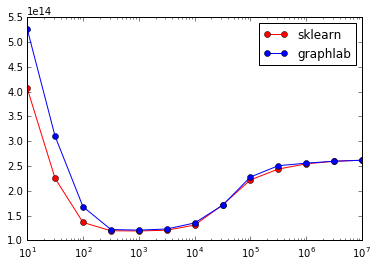

In [22]:
plt.semilogx(penalties, sk_errors, "-or", label='sklearn')
plt.semilogx(penalties, gl_errors, "-ob", label='graphlab')
plt.legend(loc=0)

In [23]:
sk_best_L2 = penalties[sk_errors.index(min(sk_errors))]
gl_best_L2 = penalties[gl_errors.index(min(gl_errors))]

print "Best sklearn alpha: %g" % (sk_best_L2 * sklearn_ridge_factor)
print "Best L2 graphlab: %f" % gl_best_L2

Best sklearn alpha: 0.1
Best L2 graphlab: 1000.000000


**OBS: remeber that the L2_penalty is scaled in the sklearn model!**


### RSS on test data using best alpha and L2

In [24]:
# Create the polynomial data sets
polydata = polynomial_sframe(train_valid_shuffled['sqft_living'], degree=15)
features = polydata.column_names()
polydata['price'] = train_valid_shuffled['price']

testpoly = polynomial_sframe(test['sqft_living'], degree=15)
testpoly['price'] = test['price']

polydata_df = polydata.to_dataframe()
testpoly_df = testpoly.to_dataframe()

In [25]:
# Sklearn
sk_model = Ridge(alpha=0.1, normalize=True)
sk_model.fit(polydata_df[features], polydata_df['price'])

# RSS
print np.sum((testpoly_df['price'] - sk_model.predict(testpoly_df[features]))**2)

1.37659663976e+14


In [26]:
# Graphlab
gl_model = gl.linear_regression.create(polydata, target='price', 
                                       features=features, validation_set=None,
                                       verbose=False, l2_penalty=1000.)
# RSS
print sum((testpoly['price'] - gl_model.predict(testpoly[features]))**2)

1.38704957785e+14
